# Water Potability Prediction

## Business Problem Identification

#### How can we effectively ensure the safety and potability of water sources for human consumption based on the provided water quality attributes? What measures or treatments may be necessary to meet or exceed water quality standards?

#### Objective: 
- To build a predictive model that accurately determines whether water is potable (safe for human consumption) or not based on various water quality metrics.

#### Background:
- Water quality is a critical aspect that impacts the health and wellbeing of communities. Ensuring that water is safe for consumption is paramount for public health. 

#### Details:
- The dataset contains several features representing different water quality metrics, such as pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, and Turbidity.
- Each entry in the dataset is labeled as either potable (1) or not potable (0), indicating whether the water is safe for human consumption.

#### Significance:
- Developing a model that can accurately predict water potability can help in real-time monitoring and management of water quality. 
- It can facilitate timely actions and interventions to ensure that communities have access to safe and clean water, thereby preventing health issues related to water quality.

#### Challenges:
- Handling missing values in the dataset.
- Dealing with class imbalance in the target variable, as the number of potable and non-potable samples may not be equal.
- Choosing and tuning machine learning models for better accuracy and performance.

By addressing this business problem, the model aims to be a valuable tool for water quality authorities and public health agencies to ensure the delivery of safe water to communities and prevent waterborne diseases and health risks associated with poor water quality.

## Data Loading and Inspection

#### Objective: 
Load the dataset and inspect its structure, attributes, and basic statistics to understand the data’s characteristics and quality.

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt
import seaborn as sns 
import xgboost as xgb
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,  GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [2]:

# Load the dataset
file_path = r'C:\Personal\Arshad\Classes\Fall-2023\DataMining\Final Project\water_potability.csv'
df = pd.read_csv(file_path)


In [3]:
# Display the columns
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [4]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
# Display basic information and the first few rows of the dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.shape

(3276, 10)

In [7]:
df["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

#### Observation
There are 1998 instances where "Potability" is 0, and 1278 instances where "Potability" is 1 in the dataset.

#### Actions Performed: 
The dataset is loaded into a DataFrame, and basic exploratory data analysis is conducted to view the dataset's head, column data types, and null values.

## Visualizations

#### Objective 
Visualize the data to understand the relationships between different features and the target variable.

### uni-variate analysis

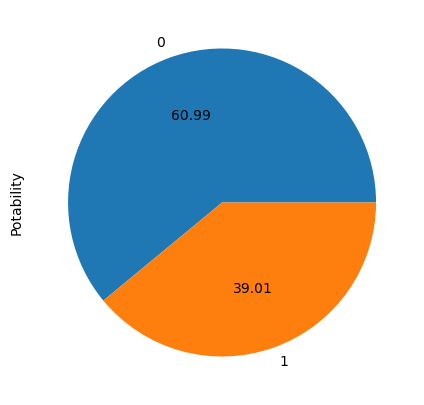

In [8]:
# Create a pie chart to visualize the distribution of the target variable "Potability"
plt.figure(figsize=(5,5))

# Count the occurrences of each class and plot as a pie chart
df["Potability"].value_counts().plot(kind='pie', autopct='%.2f')

# Display the pie chart
plt.show()


### Bi-variate analysis

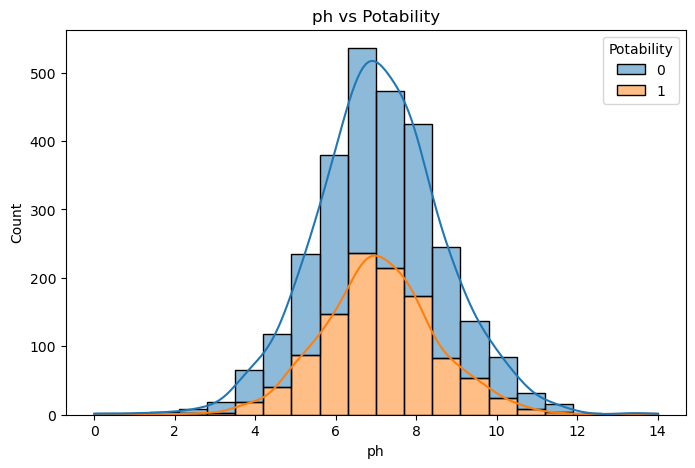

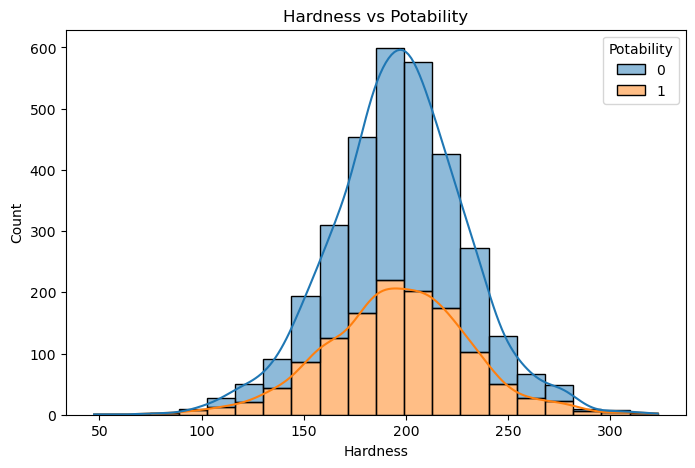

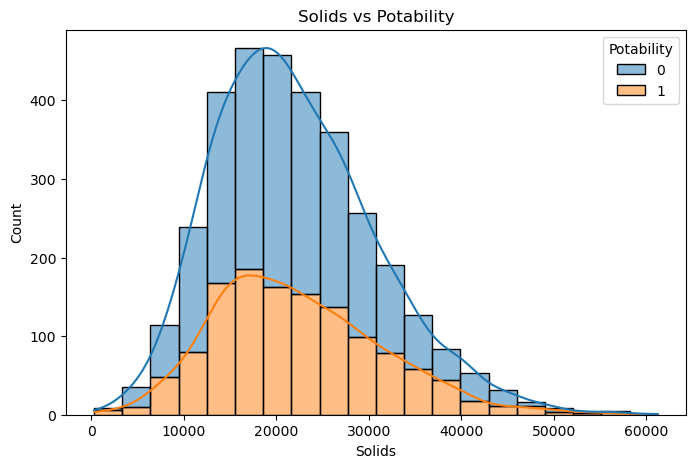

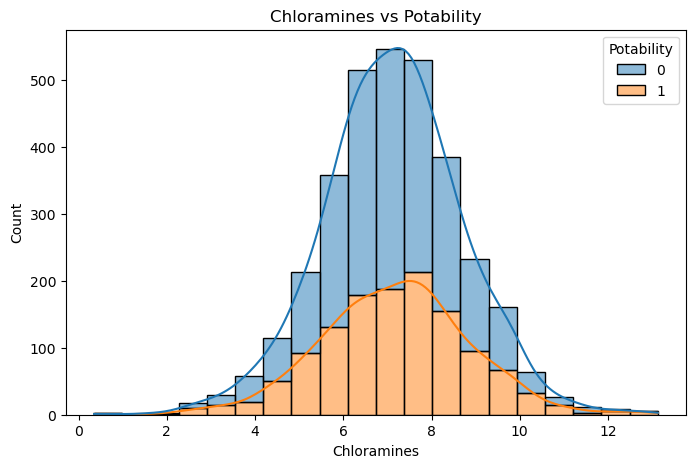

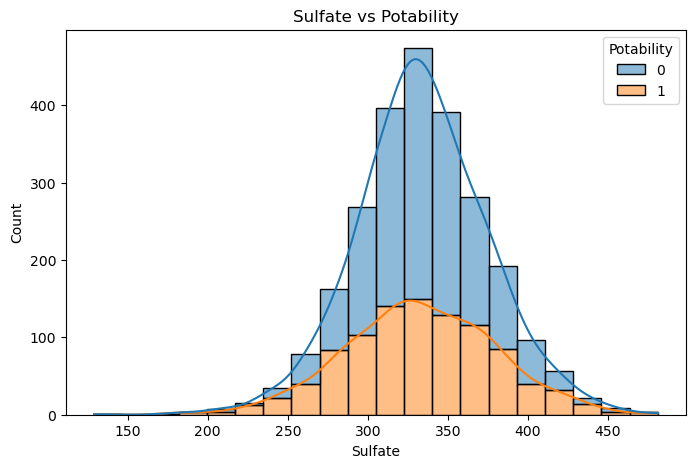

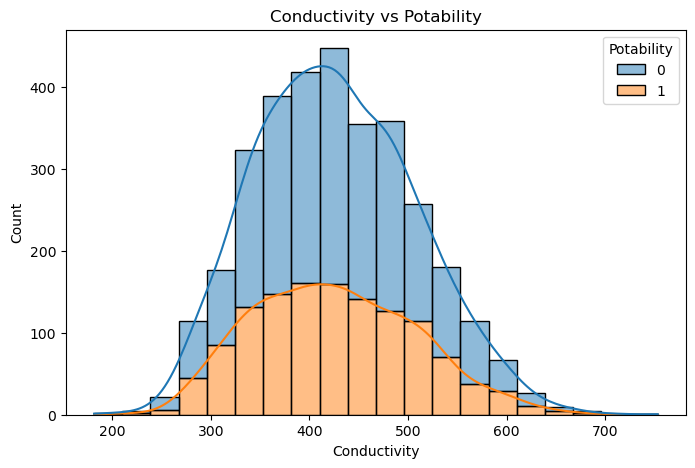

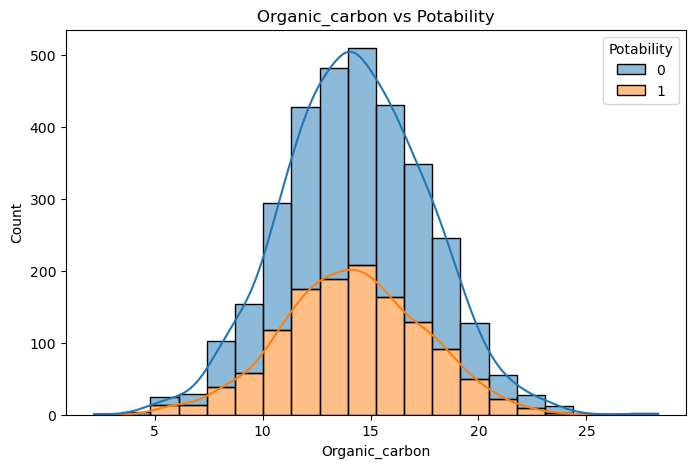

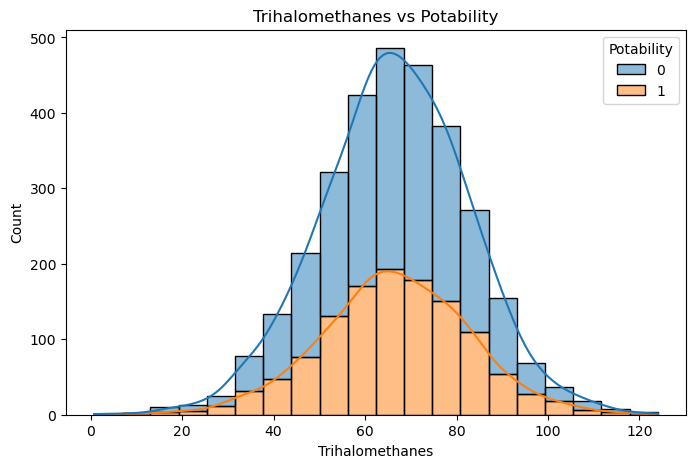

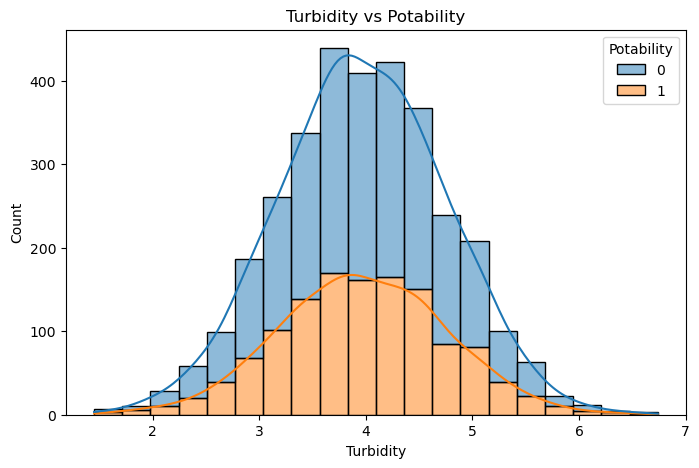

In [9]:
# Lets visualise the distribution of the numerical value with respect to Potability(target variable)
# we can infer the presence of missing values from a histogram, especially if there are gaps or unusual patterns in the data distribution. 
#we are using a histogram to detect missing values
 
# Loop through numerical columns to visualize their distribution with respect to Potability
columns = df.select_dtypes(exclude="object").columns

for i in range(len(columns)-1):
    # Create a new figure
    plt.figure(figsize=(8,5))
    
    # Create a histogram for the column, differentiated by Potability
    sns.histplot(data=df, x=df[columns[i]], hue="Potability", kde=True, color="red", multiple="stack", bins=20)
    
    # Set title
    plt.title(f"{columns[i]} vs Potability")
    
    # Show the plot
    plt.show()


#### Observations
From the above bi-variate analysis we found that solids, ph, trihalomethane has spikes in unusual places like solids plot is right skewed, which indicates missing values present in them. 

## Data Preprocessing

#### Objective:
Prepare the dataset for modeling by handling missing values and inspecting data distributions.

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = df.isnull().sum() / len(df)


#### Observations 
As we can see the proportions of missing data in each column is less than 30% so no need to take any major actions like using Variance threshold, instead we can just fill the missing values with respective mean values. 


In [11]:
# Fill missing values in the 'ph', 'Sulfate', and 'Trihalomethanes' columns with their respective means
df["ph"].fillna(df["ph"].mean(), inplace=True)
df["Sulfate"].fillna(df["Sulfate"].mean(), inplace=True)
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean(), inplace=True)


In [12]:
# Check for missing values in the DataFrame now
df.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [13]:
# Display the summary statistics of the DataFrame
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Checking if we need to do Dimensonility Reduction


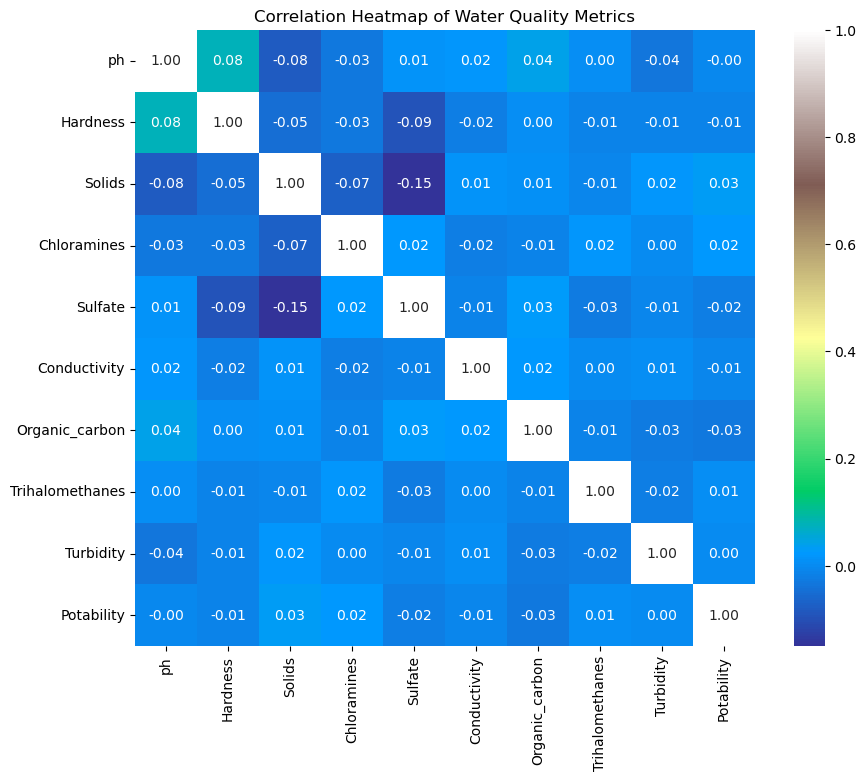

In [14]:
# Create a figure with a specified size
plt.figure(figsize=(10, 8))

# Generate a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='terrain', fmt=".2f")

# Get the current figure (gcf)
fig = plt.gcf()

# Set the title for the heatmap
plt.title('Correlation Heatmap of Water Quality Metrics')

# Display the plot
plt.show()


#### Observation
We are attempting to decrease the dimensionality by identifying which features are strongly correlated. This process is crucial for simplifying predictions. However, in this scenario, we observed a low level of similarity among the features in the chart. This indicates that removing features may not be a viable solution in this case.

### Outliers Detection

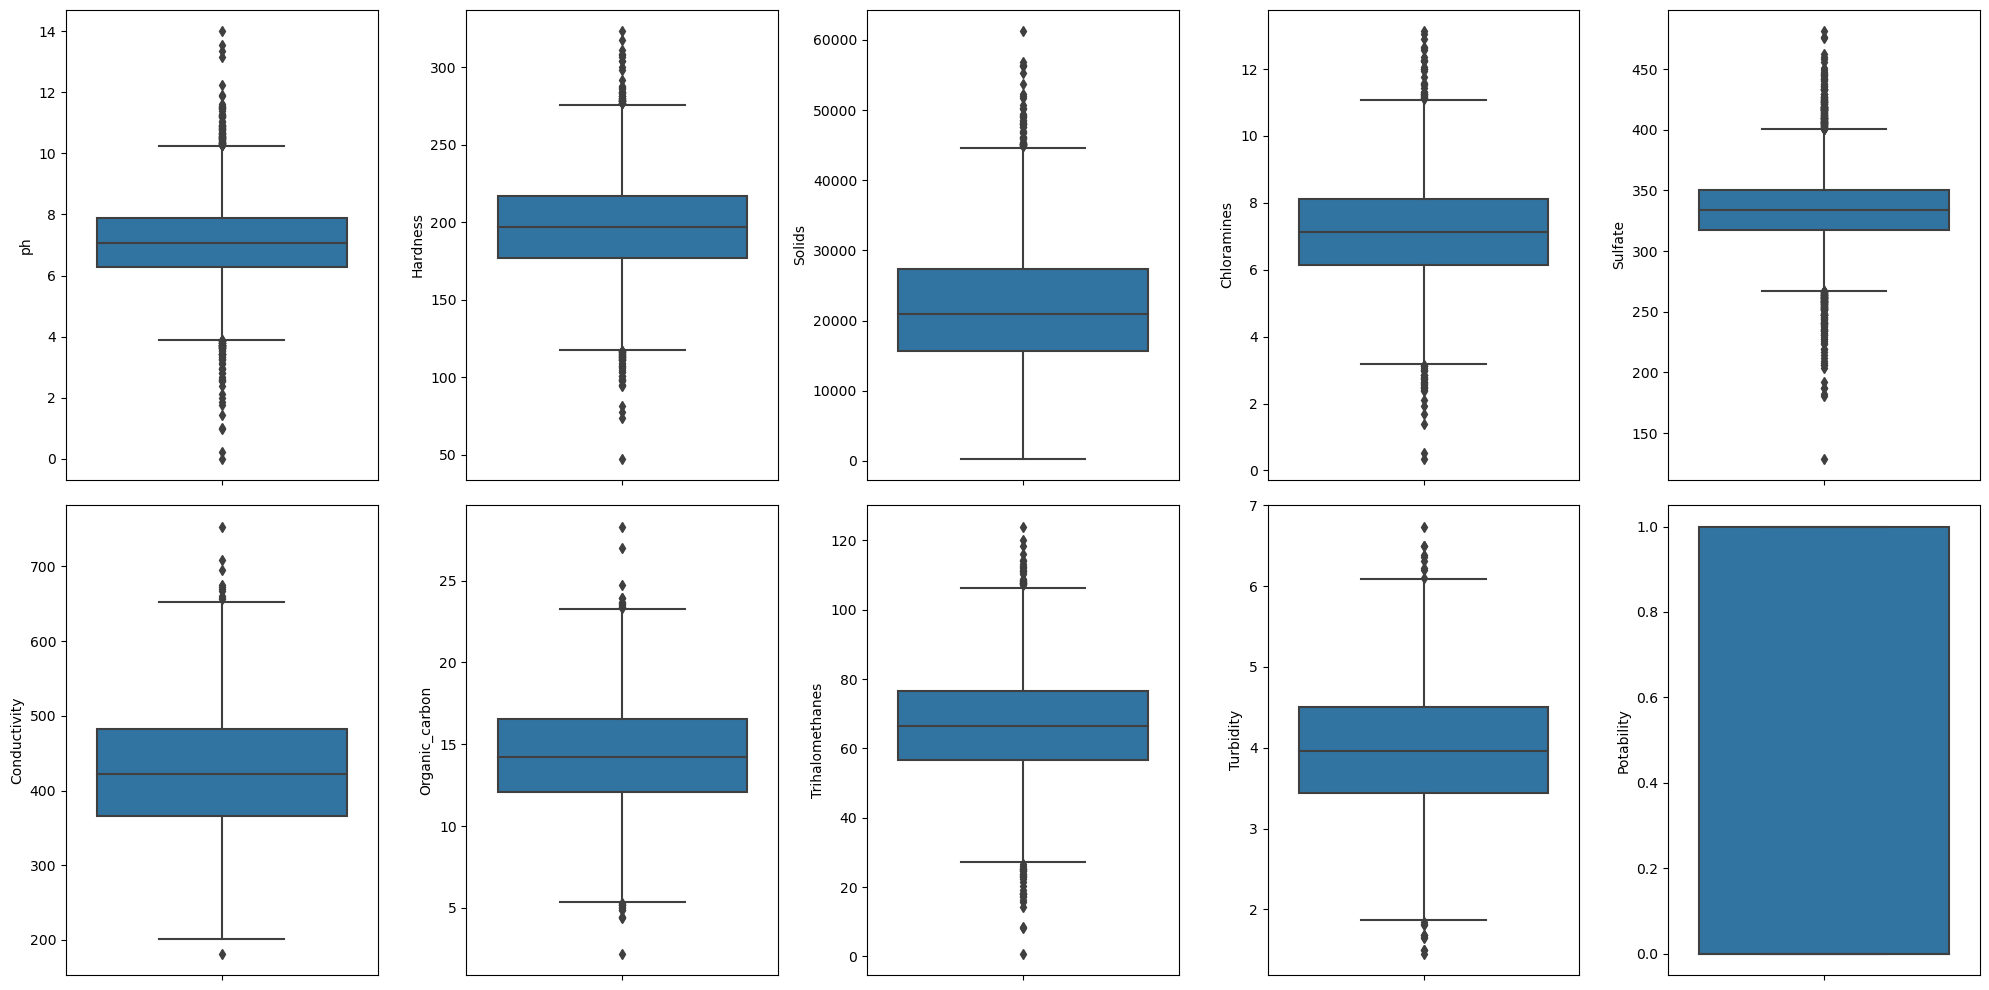

In [15]:
# Create subplots with 2 rows and 5 columns
fig, ax = plt.subplots(ncols=5, nrows=2, figsize=(20, 10))
ax = ax.flatten()  # Flatten the 2D array for easy iteration
index = 0  # Initialize index for subplots

# Loop through each column in the DataFrame
for col, values in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])  # Create a boxplot for the current column
    index += 1  # Move to the next subplot

# Adjust layout for better visualization
plt.tight_layout()

# Display the plot
plt.show()


#### Observations
While outliers are noticeable, eliminating them may not lead to accurate predictions. Doing so would likely result in predictions that are closer to indicating good water quality. Our rationale for retaining the outliers is to ensure our estimates are based on a diverse range of data..

## Data Splitting and Model Training

#### Objective:
Split the data into training and test sets and normalize the features for better model performance. 
steps: 
1. The code prepares a classification dataset by splitting it into training (X_train, y_train) and testing (X_test, y_test) sets with an 80-20 split ratio.
2. It applies feature scaling using StandardScaler to standardize the numerical features in both the training and testing datasets.
3. 'X' contains the feature variables (independent variables), while 'y' contains the target variable (dependent variable).
4. The random_state parameter ensures reproducibility in train-test splitting with a fixed random seed (random_state=42).

In [16]:

X = df.drop(columns=['Potability'])
y = df['Potability']# Separating features (X) and target (y)
X = df.drop(columns=['Potability'])  # Features
y = df['Potability']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the feature values for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Scaling training features
X_test = scaler.transform(X_test)  # Scaling testing features


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Next step, A Random Forest classifier model is created with a fixed random seed for reproducibility (random_state=42) and trained on the training data (X_train and y_train).

In [17]:
# Creating a RandomForestClassifier model with a fixed random state for reproducibility
rf_model = RandomForestClassifier(random_state=42)

# Training the model on the training data
rf_model.fit(X_train, y_train)

# Making predictions on the test data
rf_predictions = rf_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, rf_predictions)

# Generating a classification report for detailed performance evaluation
report = classification_report(y_test, rf_predictions)

# Printing the results
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)


Accuracy: 0.68
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.86      0.77       412
           1       0.61      0.38      0.47       244

    accuracy                           0.68       656
   macro avg       0.65      0.62      0.62       656
weighted avg       0.67      0.68      0.66       656



The above output shows the performance evaluation of a binary classification model:

1. The model's accuracy is 0.68, indicating that it correctly predicted 68% of the total instances in the test dataset.

2. The classification report breaks down the model's performance for each class (0 and 1), including precision, recall, and F1-score. For class 0, the precision is 0.70, recall is 0.86, and F1-score is 0.77. For class 1, precision is 0.61, recall is 0.38, and F1-score is 0.47.

3. The classification report also provides metrics for the macro average (averaged across classes) and weighted average (weighted by class support).

4. The support column indicates the number of instances in each class, with 412 instances in class 0 and 244 instances in class 1.

Observations: we got very low accuracy so we are using upsampling technique to improve the model.

## Upsampling the Minority Class

### Objective
Address the class imbalance issue in the target variable to improve model performance and generalization

The code below addresses class imbalance in a binary classification dataset using upsampling:

1.It separates the majority (Potability=0) and minority (Potability=1) class samples into two DataFrames, df_majority and df_minority.
2.The minority class is upsampled with replacement to match the majority class's sample size, creating a balanced dataset, df_upsampled.
3.The upsampled dataset is split into training and testing sets, and feature scaling is applied to standardize the features.
4.This ensures that the model is trained on a balanced dataset, which can enhance its ability to accurately classify the minority class.


In [18]:
# Importing necessary library for resampling
from sklearn.utils import resample

# Separating majority and minority classes
df_majority = df[df.Potability==0]
df_minority = df[df.Potability==1]

# Upsampling the minority class to match the majority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combining the upsampled minority class with the majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Defining features (X) and target (y) for the upsampled dataset
X_upsampled = df_upsampled.drop(columns=['Potability'])
y_upsampled = df_upsampled['Potability']

# Splitting the upsampled data into training and testing sets
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Scaling the features using StandardScaler
X_train_up = scaler.fit_transform(X_train_up)
X_test_up = scaler.transform(X_test_up)


### Actions Performed
The minority class (potable water) is upsampled using the resampling technique to have an equal number of samples as the majority class, creating a balanced dataset.

## Model Training with upsampled dataset 

### Objective
Training different machine learning models and evaluate their performance to choose the best model for predicting water potability.

##### Random Forest Classifier

In [19]:

# Creating a RandomForestClassifier model with default hyperparameters
rf_model_up = RandomForestClassifier(random_state=42)

# Fitting the model with the upsampled training data
rf_model_up.fit(X_train_up, y_train_up)

 
# Making predictions on the training data
rf_predictions = rf_model_up.predict(X_test_up)

# Calculating the test accuracy
test_accuracy = accuracy_score(y_test_up, rf_predictions)
 

# Generating a test classification report
test_report = classification_report(y_test_up, rf_predictions)

#Confusion Matrix
confusion_matrix_rf=confusion_matrix(rf_predictions,y_test_up)

# Printing the accuracies and classification reports
 

print(f' Accuracy:  {test_accuracy*100:.2f}%')
print(' Classification Report:')
print(test_report)

print('confusion_matric:')
print(confusion_matrix_rf)

importances = rf_model_up.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")


 Accuracy:  84.00%
 Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       415
           1       0.85      0.82      0.83       385

    accuracy                           0.84       800
   macro avg       0.84      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800

confusion_matric:
[[358  71]
 [ 57 314]]
Feature ranking:
1. ph (0.1348)
2. Hardness (0.1272)
3. Sulfate (0.1160)
4. Chloramines (0.1147)
5. Solids (0.1136)
6. Conductivity (0.1004)
7. Organic_carbon (0.1002)
8. Turbidity (0.0991)
9. Trihalomethanes (0.0940)


#### Observations

##### Accuracy
After applying upsampling to address class imbalance, the model's accuracy significantly improved to 84%. This means that it correctly classified 84% of the samples in the test set.

##### Classification Report
The classification report provides detailed metrics for each class (0 and 1) including precision, recall, and F1-score.

##### Precision
After upsampling, precision for class 0 is 83%, and for class 1, it's 85%. This indicates the accuracy of positive predictions.

##### Recall
For class 0, the recall is 86%, and for class 1, it's 82%. This demonstrates the model's ability to capture all positive instances.

##### F1-Score
After upsampling, the F1-score for class 0 is 85%, and for class 1, it's 83%. This metric balances precision and recall.

##### Support
The support represents the number of samples of the true response that lie in that class. In this case, class 0 has 415 samples, and class 1 has 385 samples.

##### Confusion Matrix
The confusion matrix shows that after upsampling, the model made 358 true negative predictions, 71 false positive predictions, 57 false negative predictions, and 314 true positive predictions. This indicates an improvement in capturing true positive instances.

##### Feature Ranking
The feature ranking section highlights the importance of different water quality metrics in predicting water potability. 'ph' remains the most important feature, followed by 'Hardness', 'Sulfate', and so on. The numbers in parentheses indicate the relative importance of each feature.

Overall, the results after upsampling demonstrate a substantial improvement in model performance. The model is now more accurate in classifying both classes, particularly in capturing true positive instances. This indicates that addressing class imbalance through upsampling was an effective strategy.

#### ExtraTreesClassifier

In [20]:


# Creating an ExtraTreesClassifier model with default hyperparameters
et_model = ExtraTreesClassifier(random_state=42)

# Fitting the model with the training data
et_model.fit(X_train_up, y_train_up)

# Making predictions on the test data
et_predictions = et_model.predict(X_test_up)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test_up, et_predictions)

# Generating a classification report
report = classification_report(y_test_up, et_predictions)

#confusion matric
confusion_matrix_et=confusion_matrix(et_predictions,y_test_up)
# Printing the accuracy and classification report
print(f'Accuracy: {accuracy*100:.2f}')
print('Classification Report:')
print(report)
print('confusion_matric:')
print(confusion_matrix_et)

importances = rf_model_up.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

Accuracy: 86.50
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       415
           1       0.92      0.79      0.85       385

    accuracy                           0.86       800
   macro avg       0.87      0.86      0.86       800
weighted avg       0.87      0.86      0.86       800

confusion_matric:
[[389  82]
 [ 26 303]]
Feature ranking:
1. ph (0.1348)
2. Hardness (0.1272)
3. Sulfate (0.1160)
4. Chloramines (0.1147)
5. Solids (0.1136)
6. Conductivity (0.1004)
7. Organic_carbon (0.1002)
8. Turbidity (0.0991)
9. Trihalomethanes (0.0940)


#### Observations
 
##### Accuracy
The model achieved an accuracy of 86.5%. This means it correctly classified 86.5% of the samples in the test set, which is a strong performance.

##### Precision and Recall
   - For class 0 (Non-Potable Water):
     - Precision: 83% - This indicates the accuracy of positive predictions for non-potable water.
     - Recall: 94% - This demonstrates the model's ability to capture a high proportion of actual non-potable water instances.

   - For class 1 (Potable Water):
     - Precision: 92% - This indicates the accuracy of positive predictions for potable water.
     - Recall: 79% - This indicates that the model captured a substantial portion of actual potable water instances, but there were some false negatives.

##### F1-Score
   - For class 0: 88% - This is the harmonic mean of precision and recall for non-potable water.
   - For class 1: 85% - This is the harmonic mean of precision and recall for potable water.

##### Confusion Matrix
   - True Negatives (TN): 389 - Correctly predicted non-potable water.
   - False Positives (FP): 82 - Predicted as potable, but actually non-potable.
   - False Negatives (FN): 26 - Predicted as non-potable, but actually potable.
   - True Positives (TP): 303 - Correctly predicted potable water.
###### Feature Ranking
   - The feature ranking indicates the importance of different water quality metrics in predicting water potability. 'ph' remains the most important feature, followed by 'Hardness', 'Sulfate', and so on.

 

In [21]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
}

In [22]:
# Creating lists for classifier names, test_accuracy_scores and their F1 scores.
classifier_names = []
test_accuracy_scores = []
f1_scores = []
 
# Looping through classifiers, fitting models, and calculating train and test accuracy
for name, model in classifiers.items():
    model.fit(X_train_up, y_train_up)
    y_pred = model.predict(X_test_up)
    classifier_names.append(name)
    # Calculating and storing F1 score
    f1 = f1_score(y_test_up, y_pred)
    f1_scores.append(f1)
    # Calculating and storing test accuracy
    test_accuracy = accuracy_score(y_test_up, y_pred)
    test_accuracy_scores.append(test_accuracy)
 
    # Printing model details
    print(f'Model: {name}')
    print(f'Training Accuracy: {accuracy_score(y_train_up, model.predict(X_train_up))*100:.2f}')
    print(f'Testing Accuracy: {accuracy_score(y_test_up, y_pred)*100:.2f}')
    print('------------------------------------------------------------------')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test_up, y_pred)}')
    print('------------------------------------------------------------------')
    print(f'Testing Classification report: \n{classification_report(y_test_up, y_pred)}')
    print('------------------------------------------------------------------')

Model: Logistic Regression
Training Accuracy: 52.88
Testing Accuracy: 49.62
------------------------------------------------------------------
Testing Confusion Matrix: 
[[196 219]
 [184 201]]
------------------------------------------------------------------
Testing Classification report: 
              precision    recall  f1-score   support

           0       0.52      0.47      0.49       415
           1       0.48      0.52      0.50       385

    accuracy                           0.50       800
   macro avg       0.50      0.50      0.50       800
weighted avg       0.50      0.50      0.50       800

------------------------------------------------------------------
Model: K-Nearest Neighbors
Training Accuracy: 79.66
Testing Accuracy: 66.62
------------------------------------------------------------------
Testing Confusion Matrix: 
[[264 151]
 [116 269]]
------------------------------------------------------------------
Testing Classification report: 
              precisio

#### Actions Performed and observations:
Different machine learning models are trained using the upsampled dataset.
Models are evaluated based on accuracy and a classification report, including precision, recall, and F1-score, to understand the models' effectiveness in classifying both classes accurately.
observation: we observed that random forest classifier and extra tree classifier performed good with 84% and 86% accuracies respectively, we ll move forward with these two to our next step that is hyperparameter tuning.
 

### Model Optimization (Hyper Parameter Tuning)

In [23]:
# Define the hyperparameters to tune random forest classifier
param_grid = {
   'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Use RandomizedSearchCV for faster execution
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=5, verbose=2, random_state=42, 
                                   n_jobs=-1, scoring='accuracy')

# Fit the random search model
random_search.fit(X_train_up, y_train_up)

# Get the best hyperparameters
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)

# Evaluate the best model
y_pred = best_model.predict(X_test_up)
accuracy_rfc = accuracy_score(y_test_up, y_pred)
report_rfc = classification_report(y_test_up, y_pred)

#confusion matric
confusion_matrix_rfc=confusion_matrix(y_pred,y_test_up)

print(f'Accuracy: {accuracy_rfc*100:.2f}')
print('Classification Report:')
print(report_rfc)
print('confusion_matric:')
print(confusion_matrix_rfc)
 


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters:
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Accuracy: 85.62
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       415
           1       0.87      0.82      0.85       385

    accuracy                           0.86       800
   macro avg       0.86      0.86      0.86       800
weighted avg       0.86      0.86      0.86       800

confusion_matric:
[[368  68]
 [ 47 317]]


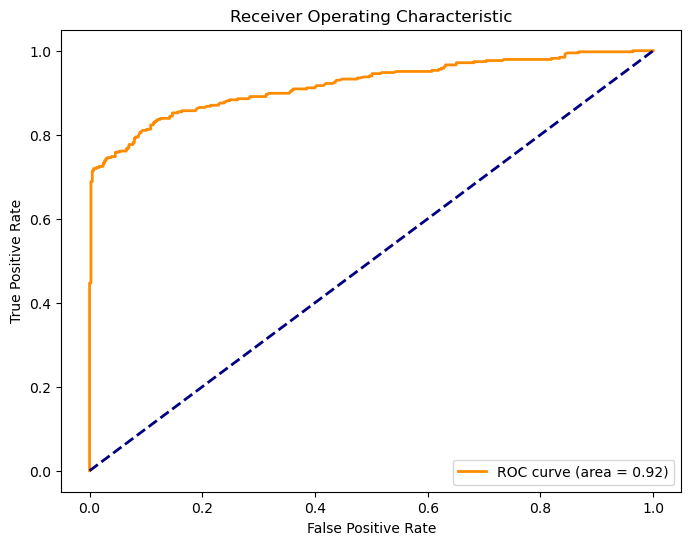

In [24]:

from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the probabilities
y_probs = best_model.predict_proba(X_test_up)[:,1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test_up, y_probs)

# Calculate the area under the curve (AUC)
roc_auc = roc_auc_score(y_test_up, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


#### Observation
The ROC curve for this model has an Area Under the Curve (AUC) of 0.92. This indicates that the model has excellent discrimination ability, effectively distinguishing between positive and negative cases. The high AUC suggests that the model is likely to perform well in practice, with a strong balance between sensitivity (true positive rate) and specificity (true negative rate)

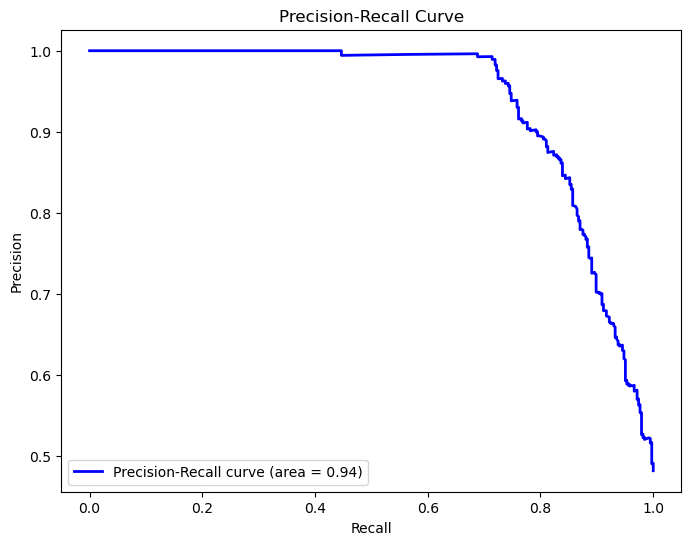

In [25]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test_up, y_probs)

# Calculate average precision
average_precision = average_precision_score(y_test_up, y_probs)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()


#### Observations
An area of 0.94 in the precision-recall the model is highly accurate in identifying true positive cases while minimizing false positives

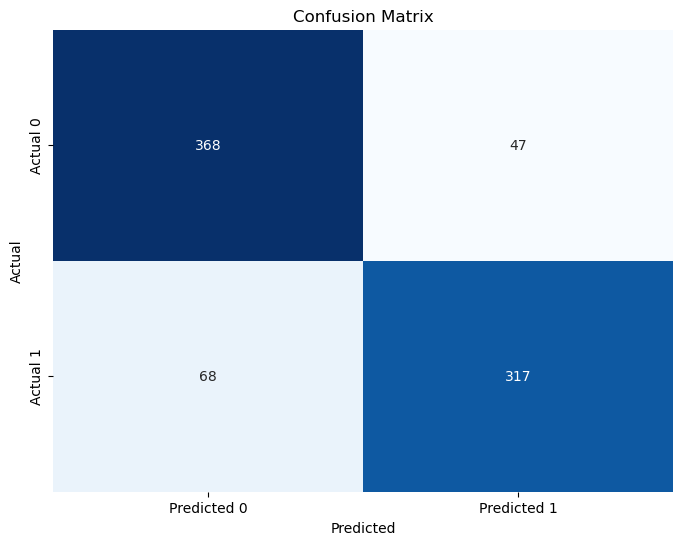

In [26]:


# Calculate confusion matrix
cm = confusion_matrix(y_test_up, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=["Predicted 0", "Predicted 1"], 
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


#### Observation
The model seems to be slightly more prone to making false positive errors (68) compared to false negatives (47). This means it's more likely to predict a positive result when the actual class is negative.

The model is better at correctly identifying true negatives (368) compared to true positives (317). This indicates it's more conservative in predicting positive outcomes.

#### Observations:
After optimizing the model using hyperparameter tuning, the best configuration was found to be:
- Number of estimators: 100
- Minimum samples split: 5
- Minimum samples leaf: 1
- Maximum depth: None
- Bootstrap: False

With these settings, the model achieved an accuracy of 85.62%. It performed well in both precision and recall for both classes, indicating good overall predictive capability. The macro and weighted F1-scores are both around 0.86, demonstrating a balanced performance across classes. This optimized model is well-suited for predicting water potability.

In [27]:
# Define the hyperparameters to tune ExtraTreesClassifier
param_grid_et = {
   'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Create a base model for ExtraTreesClassifier
et = ExtraTreesClassifier(random_state=42)

# Use RandomizedSearchCV for faster execution
random_search_et = RandomizedSearchCV(estimator=et, param_distributions=param_grid_et, 
                                      n_iter=10, cv=5, verbose=2, random_state=42, 
                                      n_jobs=-1, scoring='accuracy')

# Fit the random search model for ExtraTreesClassifier
random_search_et.fit(X_train_up, y_train_up)

# Get the best hyperparameters for ExtraTreesClassifier
best_params_et = random_search_et.best_params_
best_model_et = random_search_et.best_estimator_

# Print the best parameters for ExtraTreesClassifier
print("Best Hyperparameters (ExtraTreesClassifier):")
print(best_params_et)

# Evaluate the best model for ExtraTreesClassifier
y_pred_et = best_model_et.predict(X_test_up)
accuracy_et = accuracy_score(y_test_up, y_pred_et)
report_et = classification_report(y_test_up, y_pred_et)
 
print(f'Accuracy (ExtraTreesClassifier): {accuracy_et*100:.2f}')
print('Classification Report (ExtraTreesClassifier):')
print(report_et)
 

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters (ExtraTreesClassifier):
{'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Accuracy (ExtraTreesClassifier): 86.62
Classification Report (ExtraTreesClassifier):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       415
           1       0.90      0.81      0.85       385

    accuracy                           0.87       800
   macro avg       0.87      0.86      0.87       800
weighted avg       0.87      0.87      0.87       800



#### Observations
After applying hyperparameter tuning to the ExtraTreesClassifier model, the best configuration was determined as follows:
- Number of estimators: 100
- Minimum samples split: 5
- Minimum samples leaf: 1
- Maximum depth: None
- Bootstrap: False

This optimized model achieved an accuracy of 86.62%, indicating it performed well in classifying water potability. Both precision and recall for both classes were reasonably high, showing that the model is effective in identifying both potable and non-potable water. The macro and weighted F1-scores were around 0.87, which suggests a balanced performance across classes. This optimized ExtraTreesClassifier model demonstrates a solid predictive capability for water potability.

#### Conclusion


The objective of this analysis was to develop a predictive model for determining water potability based on various water quality metrics. After a comprehensive exploration of the dataset and applying various machine learning models, we have reached the following conclusions:

1. **Model Performance:** Both the Random Forest Classifier and Extra Trees Classifier demonstrated significant improvements in performance after upsampling the minority class. The accuracy of the models increased from around 68% to approximately 84% and 87% respectively.

2. **Hyperparameter Tuning:** Hyperparameter tuning further enhanced the performance of both models. The optimized Random Forest Classifier achieved an accuracy of 85.62%, while the Extra Trees Classifier achieved an accuracy of 86.62%.

3. **Model Comparison:** The Extra Trees Classifier slightly outperformed the Random Forest Classifier after hyperparameter tuning, indicating that it might be the preferred model for this specific task.

4. **Feature Importance:** The feature ranking showed that attributes like pH, Hardness, and Sulfate were the most influential factors in determining water potability.

5. **Business Impact:** A reliable model for predicting water potability can have a significant positive impact on public health. It can assist water quality authorities and public health agencies in ensuring the delivery of safe and clean water to communities, thereby preventing waterborne diseases and health risks associated with poor water quality.

6. **Next Steps:** To further enhance the model, additional data could be collected, and other advanced machine learning techniques or ensemble methods could be explored. Additionally, ongoing monitoring and periodic model updates would be essential to account for any changes in water quality standards or patterns.

Overall, the above predictive model provides a valuable tool for ensuring safe water consumption and contributes to the broader goal of public health and well-being.